In [12]:
import numpy as np
from qiskit.algorithms.optimizers import CMAES, GradientDescent, TellObject, SPSA
import matplotlib.pyplot as plt
from pylab import figure, cm
from matplotlib.patches import Ellipse
np.random.seed(12)

We are going to define the rosenbrock function. This function can be generalized to N dimenstions and the optimal value lives inside a valley. Is is commonly used to benchmark optimizers.

<IPython.core.display.Javascript object>


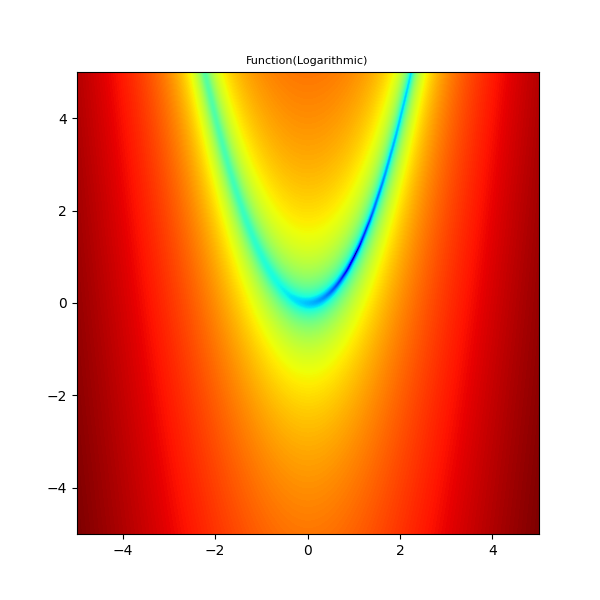

In [13]:
def rosenbrock_function(x): #Sum(1,d-1):100(x_{i+1}-x_i^2)^2 + (x_i-1)^2
    d=x.size
    A = x[1:]-x[:-1]**2
    B = x[:-1]-1
    return np.sum(100*A**2 + (B)**2 , axis = 0)


def banana_function(x,y): #2D case
    return rosenbrock_function(np.array([x,y]))


x1_min, x1_max = -5, 5
x2_min, x2_max = -5, 5

x1, x2 = np.meshgrid(np.linspace(x1_min,x1_max,500), np.linspace(x2_min,x2_max, 500))
y = banana_function(x1,x2)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(np.log10(y),extent=[x1_min,x1_max,x2_min,x2_max], cmap=cm.jet, origin='lower')
ax.set_title("Function(Logarithmic)" , fontsize=8)
plt.show()

In [23]:
ellipses = []
def callback(x,eigenvectors,std_vector):
        angle = 360/(2*np.pi) * np.arctan(eigenvectors[1,0]/eigenvectors[0,0])
        ellipses.append(((x[0], x[1]),std_vector[0],std_vector[1],angle))

N = 2
tol = 1e-10
sigma_0 = 2 #The initial point must lie in a box of size sigma arround the optimal point.
initial_point = np.random.normal(1,sigma_0,N)
print("x0=",initial_point,"|x0-1|=",np.linalg.norm(initial_point-1))

# optimizer = SPSA(maxiter = 500000)

optimizer = CMAES(maxiter=15000, tol=tol,sigma_0 = sigma_0,callback = callback)

# optimizer = GradientDescent(maxiter = 5000, tol=tol,callback = callback_gd,learning_rate = 1e-4)

result = optimizer.minimize(x0=initial_point, fun=rosenbrock_function,)
# while optimizer.continue_condition():
#     optimizer.step()
#     optimizer._callback_wrapper()
    
# result = optimizer.create_result()
print(f"After {result.nit} generations and {result.nfev} function evaluations ")#"({optimizer.mu}eval/gen)")
print("We get an objective of:",result.fun)
print("At x=",result.x,"|x0-1|=",np.linalg.norm(result.x-1))
print("Comparing our result {}")

x0= [-0.10565083  0.15629533] |x0-1|= 1.3907916212766662
After 560 generations and 3360 function evaluations 
We get an objective of: 9.351527457366698e-12
At x= [0.99999707 0.99999424] |x0-1|= 6.460878651690699e-06
Comparing our result {}


<IPython.core.display.Javascript object>


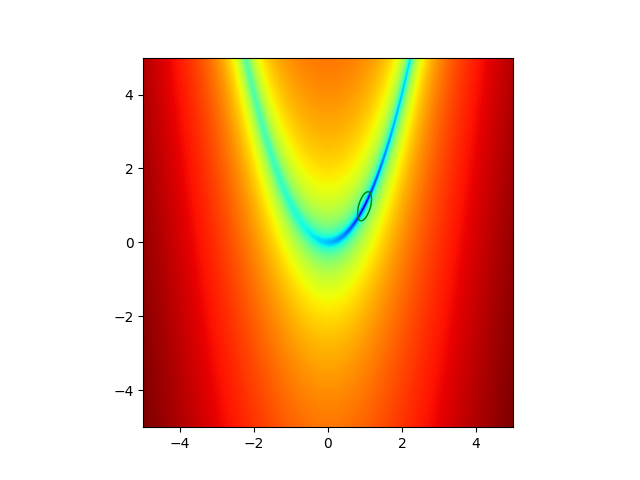

In [7]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import animation
%matplotlib notebook

ellipses_show = ellipses[:700]

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.imshow(np.log10(y),extent=[x1_min,x1_max,x2_min,x2_max], cmap=cm.jet, origin='lower')
ax.set_xlim([x1_min,x1_max])
ax.set_ylim([x2_min,x2_max])
ellipse_show = Ellipse((0, 0),
            width=1,
            height=2,
            angle=0,
            facecolor='none',
            edgecolor='green'
            )
ax.add_patch(ellipse_show)
plt.show()
def init():
    ellipse_show.set_visible(False)
    return [ellipse_show]

def animate(i):
    if i == 1:
        ellipse_show.set_visible(True)
    ellipse_show.center = ellipses_show[i][0]
    ellipse_show.width = ellipses_show[i][1]
    ellipse_show.height = ellipses_show[i][2]
    ellipse_show.angle = ellipses_show[i][3] 
    return [ellipse_show]

anim = animation.FuncAnimation(fig, animate, init_func=init, interval=50, blit=True)
plt.show()
